In [1]:
import re
import numpy as np
import nltk
import operator
import pandas as pd
import gensim
import seaborn as sns 
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))
from rake_nltk import Rake
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import naive_bayes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Godde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Godde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('CV data2.csv')
df = df.dropna()
df.set_axis(['document_id', 'Name', 'Corpus', 'Label'], axis=1, inplace=True)
df.set_index('document_id', inplace=True)
df.reset_index()
df


,Name,Corpus,Label
document_id,,,
0,10554236.pdf,analysis thereby level data ii workload 1994 ...,ACCOUNTANT
1,10674770.pdf,month annual purchasing access 2011 monthly m...,ACCOUNTANT
2,11163645.pdf,program access 2011 skill new qualification c...,ACCOUNTANT
3,11759079.pdf,county top billion tutor sole junior 2011 ski...,ACCOUNTANT
4,12065211.pdf,individual outside master 350 access averagin...,ACCOUNTANT
...,...,...,...
2479,86322251.pdf,program creative learner curriculum skill coa...,TEACHER
2480,86597425.pdf,program site level handling phi skill element...,TEACHER
2481,90363254.pdf,analysis month program thereby curriculum ski...,TEACHER


In [3]:
lst_stopwords = nltk.corpus.stopwords.words("english")
def utils_preprocess_text(text , flg_stemm=False, flg_lemm=True, lst_stopwords=None):

    
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    lst_text = text.split() 
    
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
  
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [4]:
df["text_clean"] = df["Corpus"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))



In [5]:
vectorizer = TfidfVectorizer(max_features=10000)
vectors = vectorizer.fit_transform(df['Corpus'])
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df_word = pd.DataFrame(denselist, columns=feature_names)

In [22]:
from sklearn.datasets import make_multilabel_classification
A, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,  random_state=0)
cross_val_score(lda,dense , cv=10)

C:\Users\Godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:585

In [ ]:

fig, ax = plt.subplots(figsize=(50,50))   
sns.heatmap(df_word,ax= ax, cmap = sns.cm.rocket_r)

In [8]:
pd.concat([df_word,df['Label']], axis=1)

,00,000,01,02,03,04,05,06,07,08,...,zenworks,zero,zeta,zion,zip,zone,zoo,zoom,zumba,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCOUNTANT
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCOUNTANT
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCOUNTANT
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCOUNTANT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACCOUNTANT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TEACHER
2480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TEACHER
2481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TEACHER
2482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TEACHER


In [9]:
import sklearn
le = sklearn.preprocessing.LabelEncoder()
enc_df = pd.DataFrame(le.fit_transform(df[['Label']]))
y = enc_df
print(y.shape)
print(df_word.shape)

(2483, 1)
(2483, 10000)


C:\Users\Godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(  df_word, y.to_numpy(), test_size=0.33, random_state=42)

In [11]:
classifier = naive_bayes.MultinomialNB()

## train classifier
model= classifier.fit(X_train, y_train.reshape(1663,))
## test
predictions = model.predict(X_test)


In [12]:
score = classifier.score(X_test, y_test)
print(score)

0.43902439024390244


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5,  random_state=0)
#cross_val_score(lda, df_word, y.to_numpy().reshape(2483,), cv=10)

In [14]:
from sklearn.datasets import make_multilabel_classification
A, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,  random_state=0)

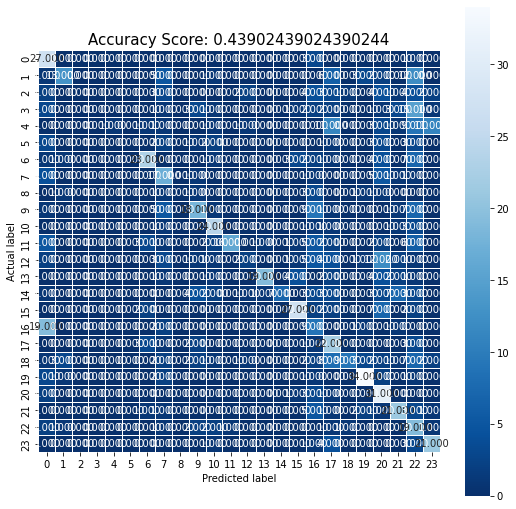

In [15]:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [16]:
df['Label'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Label, dtype: int64